In [1]:
from __future__ import unicode_literals, print_function

import plac
import random
from pathlib import Path
import spacy
from spacy.util import minibatch, compounding
from tqdm import tqdm

In [2]:
#load the cleaned and prepared data (stored in serilyzed mode)
import pickle

with open("D:/mlds_data/text_mining/projet/prepared_data/cleaned_data_V1.txt", "rb") as fp:   # Unpickling

    DATA = pickle.load(fp)
    
    #let the 100 last documents for test
    DATA = DATA[0:len(DATA)-100]
    
    random.shuffle(DATA)
    
    TRAIN_DATA=[]
    #because bug on training big documents we filter and take only the one's inf 30000 chars
    for i in DATA:
        if(len(i[0])<30000):
            TRAIN_DATA.append(i)
    
    #take only 3000 samples to train the model
    if(len(TRAIN_DATA)>3000):
        TRAIN_DATA= random.sample(TRAIN_DATA, 3000)
    print(len(TRAIN_DATA))

3000


In [3]:

new_model_name='GENE_DISEASE'
#number of poc training 
n_iter=14

# create blank Language class for our model
nlp = spacy.blank('en')  
print("Created blank 'GENE_DISEASE' model")

# create the Named Entity Recognizer 'ner' pipe, the pipe how will detect the entities  
ner = nlp.create_pipe('ner')
nlp.add_pipe(ner)

# add new entity label to entity recognizer
ner.add_label('GENE') 
ner.add_label('DISEASE')  

#init the training 
optimizer = nlp.begin_training()


Created blank 'GENE_DISEASE' model


In [4]:
# get names of other pipes to disable them during training, in our case there is'nt, but in case of loading existing model
other_pipes = [pipe for pipe in nlp.pipe_names if pipe != 'ner']
with nlp.disable_pipes(*other_pipes):  # only train NER
    for itn in range(n_iter):
        print("enter itteration num : ", itn)
        random.shuffle(TRAIN_DATA)
        losses = {}
        # batch up the examples using spaCy's minibatch
        batches = minibatch(TRAIN_DATA, size=compounding(4., 32., 1.001))

        for batch in tqdm(batches):
            texts, annotations = zip(*batch)
            nlp.update(texts, annotations, sgd=optimizer, 
                       losses=losses)
        print('Losses', losses)

        
#export the trained model  
output_dir="D:/mlds_data/text_mining/projet/model"
output_dir = Path(output_dir)
if not output_dir.exists():
    output_dir.mkdir()
nlp.meta['name'] = new_model_name  # rename model
nlp.to_disk(output_dir)
print("Saved model to", output_dir)

enter itteration num :  0


11it [00:48,  4.29s/it]

KeyboardInterrupt: 

In [1]:
losses = [2315.893114962926,338.57318208853184,
185.35685714624378,125.44187513095302,
96.52762947899139,78.86976433692699, 72.04898093570336,
 66.99524835552768, 51.370961276765364,47.96713968294975]

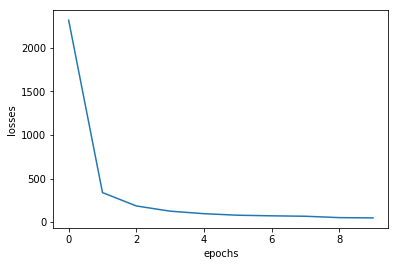

In [4]:
import matplotlib.pyplot as plt
plt.plot(losses)
plt.ylabel('losses')
plt.xlabel('epochs')
plt.show()

DISEASE Epilepsy
DISEASE Multiple sclerosis
